# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [1]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

### Réponse 1):

- **Importation de données**: j'ai mis le fichier "data.csv" dans le même dossier que ce jupyter notebook. Sinon il faut mettre le chemin du fichier --> pd.read_csv('chemin_de_fichier'). 

In [2]:
# Import du dataframe "data.csv"
df = pd.read_csv('./data.csv')

- **Visualisation rapide des données**: cela nous permet de vérifier si le fichier a été bien importé, en plus on peut voir rapidement s'il s'agit de données majoritairement numériques ou catégorielles. On peut aussi détecter les incohérences dans données (le format essentiellement). Ici on remarque que la colonne "Experience" n'est pas au bon format pour les valeurs numériques pour les fichiers "csv". Je pense que le fichier a été édité initialement sous Excel !

In [3]:
df.head(n=10) # pour voir seulement les 10 premiers lignes des données (ou simplement "df_head()"")

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6,Lille
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4,Toulouse
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8,Paris
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5,Toulouse


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

### Réponse 2):

In [4]:
print(f"Ce dataset contient {df.shape[0]} observations and "f"{df.shape[1]} colonnes")

Ce dataset contient 9582 observations and 6 colonnes


- **Valeurs manquantes**: on peut constater rapidement qu'il y a des valeurs manquantes avec "df.info()" puisque on a 9582 observations, et que certaines colonnes ont moins d'éléments non nulls que cette valeur (9582)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entreprise    9565 non-null   object
 1   Metier        9563 non-null   object
 2   Technologies  9582 non-null   object
 3   Diplome       9582 non-null   object
 4   Experience    9488 non-null   object
 5   Ville         9582 non-null   object
dtypes: object(6)
memory usage: 449.3+ KB


- **Avec plus de précision**: on peut déterminer le nombre de valeurs manquentes pour chaque colonne ainsi que leurs indices

In [6]:
#La liste des colonnes qui contient des valeurs manquantes
NaN_col = df.columns[df.isnull().any()].tolist()
NaN_col

['Entreprise', 'Metier', 'Experience']

In [7]:
# Nombre de valeurs manquentes par colonne, on peut aussi voir le pourcentage (qui est plus utile pour estimer leurs impactes)
df.isnull().sum()

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

In [8]:
# En pourcentage (effet non considérable des valeurs manquantes)
print(round((df.isna().sum() * 100/ len(df)),2).sort_values(ascending=False))

Experience      0.98
Metier          0.20
Entreprise      0.18
Technologies    0.00
Diplome         0.00
Ville           0.00
dtype: float64


In [9]:
# les indices des valeurs manquantes
for i in NaN_col:
    globals()[f'idx_NaN_{i}'] = df[df[i].isna()].index.tolist()
    print(f"Les indices des {i}s avec une valeur manquante sont ", globals()[f'idx_NaN_{i}'])

Les indices des Entreprises avec une valeur manquante sont  [464, 2499, 2901, 3763, 3985, 4384, 4432, 5060, 5568, 5928, 7054, 7426, 7733, 8039, 8148, 8579, 9289]
Les indices des Metiers avec une valeur manquante sont  [346, 2058, 2670, 2899, 3346, 4248, 4290, 4292, 5425, 5593, 5712, 6024, 6625, 7091, 7228, 7330, 9087, 9427, 9490]
Les indices des Experiences avec une valeur manquante sont  [4, 28, 104, 161, 451, 599, 800, 1122, 1150, 1251, 1256, 1333, 1373, 1507, 1759, 1794, 2085, 2485, 2498, 2545, 2568, 2648, 2649, 2852, 2870, 2967, 3077, 3236, 3276, 3484, 3801, 3828, 3871, 3883, 3907, 4016, 4125, 4323, 4333, 4468, 4488, 4658, 4686, 4782, 4838, 4881, 5095, 5119, 5455, 5551, 5708, 5723, 5762, 5845, 5904, 5941, 6052, 6055, 6106, 6324, 6335, 6351, 6358, 6624, 6634, 6675, 6781, 6784, 6805, 7009, 7322, 7451, 7676, 7694, 7695, 7743, 7959, 8115, 8216, 8276, 8404, 8564, 8574, 8628, 8645, 8668, 8684, 8966, 9153, 9296, 9496, 9498, 9510, 9512]


In [10]:
df.dropna().count()

Entreprise      9452
Metier          9452
Technologies    9452
Diplome         9452
Experience      9452
Ville           9452
dtype: int64

En éliminant toutes les valeurs manquantes dans le dataset, il nous reste 9552 sur 9582. Donc, probablement, les valeurs manquantes n'auront pas d'effet sur la prévision à réaliser après.

### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

### Réponse 3):

- La première chose que j'ai décidé de faire est de corriger le format de la variable Expérience

In [11]:
#Convertire la variable Experience de "string" vers "float" et remplacer le "," par "." (format de "floats" pour "csv files") 
df['Experience']=df.Experience.str.replace(',', '.').astype(float)

- Vérification

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entreprise    9565 non-null   object 
 1   Metier        9563 non-null   object 
 2   Technologies  9582 non-null   object 
 3   Diplome       9582 non-null   object 
 4   Experience    9488 non-null   float64
 5   Ville         9582 non-null   object 
dtypes: float64(1), object(5)
memory usage: 449.3+ KB


- J'ai décidé aussi de travailler avec une copie du dataset (nommé "new_df" dans la suite) et laisser en sécurité/disponibilité le dataset d'origine 

In [13]:
new_df=df.copy()

**Imputation des valeurs manquantes**: 
- On peut faire cette tâche avec plusieurs méthodes. Soit on on traite les pandas dataframes avec la librairie "pandas" et les indices détectés précedement ("idx_NaN_{variable}"). Les étapes consistent essentiellement à:   
1) Extraire les tableaux des 'Data scientist" et "Data engineer" séparément.     
2) Calculer la médiane la moyenne respectivement pour ces deux catégories (de préférence utiliser ".dropna(how='any').{median/mean}()" lors du calcul).   
3) Extraire les tableaux des ces deux catégories avec 'NaN' seulement (en utilisant par exemple: "new_df.iloc[idx_NaN_Experience].loc[new_df['Metier'] == 'Data engineer']".   
4) Remplacer les 'NaN' par les valeurs souhaitées et calculées dans l'étape 2) en utilisant (".fillna(df[df['Metier'] == 'Data scientist']['Experience']" par exemple.    
5) Finalement remplacer les tableaux obtenus à l'étape 4) dans le dataset intial (new_df).  
***N.B**: On garde les index en place 

**En utlisant la librairie sklearn**: 
- Dans une optique de "Machine learning" il est mieux d'utiliser cette librairie pour l'imputation des valeurs manquantes (c'est mon choix pour répondre à cette question).
- **N.B**: SimpleImputer replaces the previous sklearn.preprocessing.Imputer  (New in version 0.20)



In [14]:
from sklearn.impute import SimpleImputer

# Les données pour "Data scientist" et "Data engineer"
df_data_scientist = new_df.loc[new_df["Metier"] == 'Data scientist'][['Experience']]
df_data_engineer = new_df.loc[new_df["Metier"] == 'Data engineer'][['Experience']]

# Les données pour "Data scientist" et "Data engineer"
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

# Mettre en place la/les méthodes de  "Imputation transformer"
imp_mean.fit(df_data_engineer[['Experience']])
imp_median.fit(df_data_scientist[['Experience']])

#Imputation par la moyenne et la médiane respectivement pour DE et DS
df_data_engineer['Experience'] = imp_mean.fit_transform(df_data_engineer[['Experience']])
df_data_scientist['Experience'] = imp_median.fit_transform(df_data_scientist[['Experience']])

# Remplacer les tableaux obtenus dans notre datase
new_df.loc[df_data_engineer.index,'Experience'] = df_data_engineer['Experience']
new_df.loc[df_data_scientist.index,'Experience'] = df_data_scientist['Experience']

**Commentaires sur la réponse 3)**: 
- J'ai calculé la moyenne et la médiane de l'experience par metier: "Data enginneer" (DE) et "Data scientist" (DS) respectivement et séparément et non sur la totalité des expérience (tout metier compris). Cela me semlait plus pertinent.
- On peut aussi visualiser l'effet de cette imputation sur le dataset, utiliser autres estimateurs pour les "NaN", vérifier si la moyenne et la médiane sont pertinent (test de normalité des datasets,etc.), imputer les autres "NaN" pour "Data architecte" et "Lead data scientist",...
- Je me suis limitée à la tâche demandée

Une petite vérification: 

In [15]:
new_df.iloc[idx_NaN_Experience].loc[new_df['Metier'] == 'Data engineer']

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
161,JLL,Data engineer,C/C++/Java/Python/Linux,Master,2.984959,Toulouse
800,RecruiterDNA,Data engineer,Hadoop/Hive/SQL/MariaDB,Master,2.984959,Toulouse
1122,Cooperative Institute for Research in the Atmo...,Data engineer,Java/Hadoop/HDFS/Yarn,Bachelor,2.984959,Toulouse
2568,National Instruments,Data engineer,Python/Java/Linux/GNU,Master,2.984959,Rennes
2649,Ball Aerospace,Data engineer,Python/Pyspark/Spark,No diploma,2.984959,Bordeaux
2852,Ball Aerospace,Data engineer,Python/Java/Linux/GNU,Master,2.984959,Paris
3828,Darwin Recruitment,Data engineer,Python/Pyspark/Spark,Bachelor,2.984959,Toulon
5455,Ball Aerospace,Data engineer,Map-Reduce/HDFS/PIG/HBASE/Python/Cassandra,Phd,2.984959,Lille
5723,Sensoleak,Data engineer,Python/Spark/GNU/Linux,Master,2.984959,Marseille
5845,Ball Aerospace,Data engineer,Linux/Python/Hadoop/Perl/Ruby,Master,2.984959,Marseille


In [16]:
new_df.iloc[idx_NaN_Experience].loc[new_df['Metier'] == 'Data scientist']

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux
104,Capgemini,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Bachelor,2.0,Bordeaux
599,Matrix Resources,Data scientist,Python/Tensorflow/R/Big data,Master,2.0,Marseille
1373,Takeda Pharmaceutical,Data scientist,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Phd,2.0,Paris
1759,Broad Institute,Data scientist,R/machine learning/Excel/VBA,Bachelor,2.0,Bordeaux
2498,Stantec,Data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Phd,2.0,Paris
2648,Ball Aerospace,Data scientist,Excel/VBA/R,Phd,2.0,Paris
2870,KPMG,Data scientist,Python/R/machine learning/Excel/VBA/C++,Master,2.0,Bordeaux
2967,Ball Aerospace,Data scientist,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,2.0,Lyon
3077,Agios Pharmaceuticals,Data scientist,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,2.0,Nice


### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

### Réponse 4)

Je ne savais pas exactement si vous voulez les années d'experiences avant ou après imputation ?  
Dans le doute, je réponds pour les deux cas (par contre il me semblait plus logique que c'est avant l'imputation)

- **Avant imputation**

In [17]:
# En utilisant le df d'origine 
print("Les années d'experiences pour:\n")
print("Data scientist est", round(df.loc[df['Metier'] == 'Data scientist'].dropna(how='any').mean()[0],4))
print("Lead data scientist est", round(df.loc[df['Metier'] == 'Lead data scientist'].dropna(how='any').mean()[0],4))
print("Data engineer est", round(df.loc[df['Metier'] == 'Data engineer'].dropna(how='any').mean()[0],4))


Les années d'experiences pour:

Data scientist est 2.2439
Lead data scientist est 3.9589
Data engineer est 2.9862


- **Après imputation**

Imputer les valeurs manquantes de "Lead data scientist" et "Data architecte" avec la moyenne:

In [18]:
# Les données pour "Lead data scientist" et "Data architecte"
df_data_architecte = new_df.loc[new_df["Metier"] == 'Data architecte'][['Experience']]
df_lead_data_scientist = new_df.loc[new_df["Metier"] == 'Lead data scientist'][['Experience']]

# Les données pour "Lead data scientist" et "Data architecte"
imp_mean_lds = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean_da = SimpleImputer(missing_values=np.nan, strategy='mean')

# Mettre en place la/les méthodes de  "Imputation transformer"
imp_mean_da.fit(df_data_architecte[['Experience']])
imp_mean_lds.fit(df_lead_data_scientist[['Experience']])

#Imputation par la moyenne pour DA et LDS
df_data_architecte['Experience'] = imp_mean_da.fit_transform(df_data_architecte[['Experience']])
df_lead_data_scientist['Experience'] = imp_mean_lds.fit_transform(df_lead_data_scientist[['Experience']])

# Remplacer les tableaux obtenus dans notre datase
new_df.loc[df_data_architecte.index,'Experience'] = df_data_architecte['Experience']
new_df.loc[df_lead_data_scientist.index,'Experience'] = df_lead_data_scientist['Experience']

Calcul de la moyenne:

In [19]:
# En utilisant le new_df 
print("Les années d'experiences pour:\n")
print("Data scientist est", round(new_df.loc[new_df['Metier'] == 'Data scientist'].mean()[0],4))
print("Lead data scientist est", round(new_df.loc[new_df['Metier'] == 'Lead data scientist'].mean()[0],4))
print("Data engineer est", round(new_df.loc[new_df['Metier'] == 'Data engineer'].mean()[0],4))


Les années d'experiences pour:

Data scientist est 2.2413
Lead data scientist est 3.9653
Data engineer est 2.985


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

### Réponse 5)

Comme la différence entre les moyennes avant et après imputation est négligeable, j'utiliserais alors celles d'avant imputation.

- En utilisant bar plot (matplotlib):

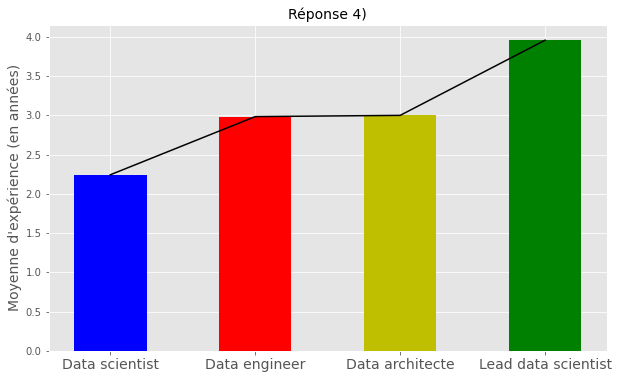

In [20]:
import warnings
warnings.filterwarnings('ignore') 

plt.figure(figsize=(10,6))
plt.subplot(111)
x=df['Metier'].value_counts().keys()
y=[df.loc[df['Metier'] == 'Data scientist']['Experience'].mean(),df.loc[df['Metier'] == 'Data engineer'].mean(),df.loc[df['Metier'] == 'Data architecte']['Experience'].mean(),df.loc[df['Metier'] == 'Lead data scientist'].dropna(how='any').mean()]
y_std=[df.loc[df['Metier'] == 'Data scientist']['Experience'].std(),df.loc[df['Metier'] == 'Data engineer'].std(),df.loc[df['Metier'] == 'Data architecte']['Experience'].std(),df.loc[df['Metier'] == 'Lead data scientist'].dropna(how='any').std()]
plt.bar(x, y, 0.5, color = ['b','r','y','g'])
plt.plot(x, y, color = 'k')

plt.xticks(x, fontsize = 14)
plt.ylabel("Moyenne d'expérience (en années)", fontsize = 14)
plt.title("Réponse 4)", fontsize=14)
plt.show()

- Choix 2: en utilisant seaborn et boxplot (avec visulation de la moyenne, médiane et min/max) 

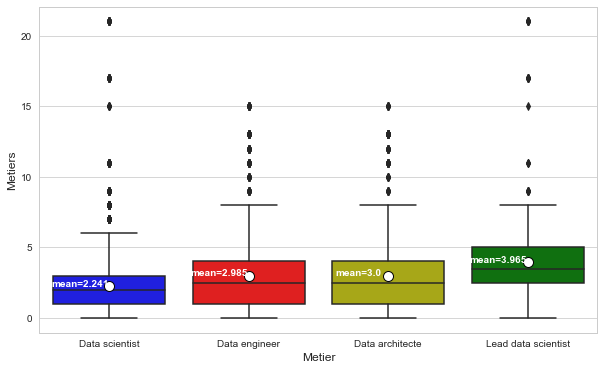

In [21]:
sb.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['b','r','y','g']
sb.set_palette(sb.color_palette(colors))
ax = sb.boxplot(data = new_df.sort_values(by=['Experience']), x = "Metier", y = "Experience", showmeans = True, meanprops = {"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})
ax.set_ylabel('Experience (années)')
ax.set_ylabel('Metiers')

#ajout de la moyenne car les boxplot donne les médianes
m = new_df.groupby(['Metier'])['Experience'].mean().values
m = np.sort(m)
mL = [str(np.round(s, 3)) for s in m]
ind = 0
for tick in range(len(ax.get_xticklabels())):
    ax.text(tick-.21, m[ind], f'mean={mL[ind]}', horizontalalignment='center',  color='w', weight='semibold')
    ind += 1 
plt.show()

- On peut aussi visulaiser les ditributions des datasets: inspecter l'asymetrie, le non linéarité de data,etc...
- Pour cela, je trace les histogrammes de chaque profil, et au même temps j'estime sa densité de probabilité en mettant l'hypothèse que l'histogramme suit une loi normale de moyenne $\mu$ et d'ecart type $\sigma$. Ces graphiques peuvent nous aider dans la suite (ils peuvent aussi engendrer d'autres analyses). 

In [22]:
# Tableaux des profils
df_Data_scientist = new_df.loc[new_df['Metier'] == 'Data scientist']
df_Data_engineer = new_df.loc[new_df['Metier'] == 'Data engineer']
df_Data_architecte = new_df.loc[new_df['Metier'] == 'Data architecte'].dropna(how='any')
df_Lead_data_scientist = new_df.loc[new_df['Metier'] == 'Lead data scientist'].dropna(how='any')

In [23]:
from scipy.stats import norm
# Estimation de 𝜇 et 𝜎 à partir des tableaux de profils
mu_Data_scientist, std_Data_scientist = norm.fit(df_Data_scientist['Experience'])
mu_Data_engineer, std_Data_engineer = norm.fit(df_Data_engineer['Experience'])
mu_Data_architecte, std_Data_architecte = norm.fit(df_Data_architecte['Experience'])
mu_Lead_data_scientist, std_Lead_data_scientist = norm.fit(df_Lead_data_scientist['Experience'])


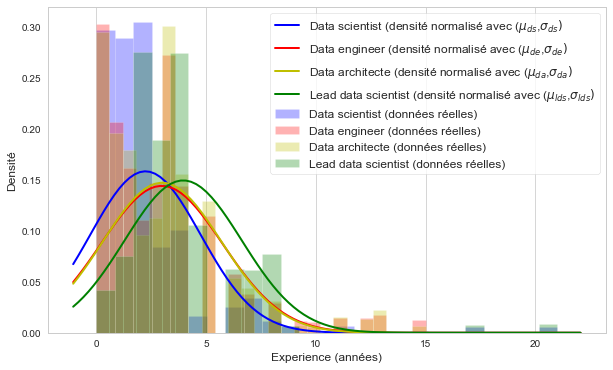

In [24]:
# Plot des histogrammes
plt.figure(figsize=(10,6))
plt.hist(df_Data_scientist['Experience'], bins=25, density=True, alpha=0.3, color='b', label = 'Data scientist (données réelles)')
plt.hist(df_Data_engineer['Experience'], bins=25, density=True, alpha=0.3, color='r', label = 'Data engineer (données réelles)')
plt.hist(df_Data_architecte['Experience'], bins=25, density=True, alpha=0.3, color='y', label = 'Data architecte (données réelles)')
plt.hist(df_Lead_data_scientist['Experience'], bins=25, density=True, alpha=0.3, color='g', label = 'Lead data scientist (données réelles)')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
# Génération des densités de probabilité à partir des 𝜇 et 𝜎 estimés pour chaque profil
p_Data_scientist = norm.pdf(x, mu_Data_scientist, std_Data_scientist)
p_Data_engineer = norm.pdf(x, mu_Data_engineer, std_Data_engineer)
p_Data_architecte = norm.pdf(x, mu_Data_architecte, std_Data_architecte)
p_Lead_data_scientist = norm.pdf(x, mu_Lead_data_scientist, std_Lead_data_scientist)

# Plot de ces densité
plt.plot(x, p_Data_scientist, 'b', linewidth=2, label = r'Data scientist (densité normalisé avec ($\mu_{ds}$,$\sigma_{ds})$')
plt.plot(x, p_Data_engineer, 'r', linewidth=2, label = r'Data engineer (densité normalisé avec ($\mu_{de}$,$\sigma_{de})$')
plt.plot(x, p_Data_architecte, 'y', linewidth=2, label = r'Data architecte (densité normalisé avec ($\mu_{da}$,$\sigma_{da})$')
plt.plot(x, p_Lead_data_scientist, 'g', linewidth=2, label = r'Lead data scientist (densité normalisé avec ($\mu_{lds}$,$\sigma_{lds})$')
plt.legend(fontsize=12)
plt.grid(which='major', axis='y', linewidth=2)
plt.xlabel('Experience (années)')
plt.ylabel('Densité')
plt.show()

**Commentaires**
- On peut constater visuellement (approximativement, sans le prouver par le calcul(test de normalité)) que la moyenne est un estimateur efficace des densités de probabilité pour tous les metiers (95% des bins sont entre $\mu$ + 2 $\sigma$ et $\mu$ - 2 $\sigma$. La moyenne comme estimateur est satisfaisant (on peut arrêter l'analyse).
- On peut tester aussi si les moyennes pour ces profils sont significativement différents ou pas (en utilisant le test student par exemple dans la librairie scipy !). Et cela peut être utile dans la question suivante, càd pour labeliser la variable "Expérience".

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

### Réponse 6)

Le choix de la règle de transformation: Experience (variable numérique) --> Exp_label (variable categorielle), peut se faire de deux manières:
- **La première méthode**: c'est nous (l'entreprise et/ou le data scientist) qui vont fixer les règles pour attribuer à chaque profil un Exp_label selon les années de'experience. On peut, pour cela, faire référence à des articles sur internet. Par exemple, un article sur le site cadre-emploi (https://www.cadremploi.fr/editorial/conseils/salaire/detail/article/cadres-seniors-comment-baisser-ses-pretentions-salariales-sans-perdre-la-face.html#ancre-0) attribue à:
- Jeune diplômé : de 0 à 1 année d’expérience. (**--> peut correspondre à "débutant" dans notre cas**)
- Junior : de 2 à 4 années d’expérience. (**--> peut correspondre à "confirmé" dans notre cas**)
- Confirmé : entre 5 et 9 années d’expérience. (**--> peut correspondre à "avancé" dans notre cas**)
- Senior ou expérimenté : au-dessus de 10 années d’expérience. (**--> peut correspondre à "expert" dans notre cas**)

Une fois la règle est fixé, on peut utiliser "pd.cut" en définissant les bins (cut-off points) comme au suivant: 

In [25]:
"""
[0,1] -> "débutant"
(1,4] -> "confirmé"
(4,9] -> "avancé"
(9,Max] -> "expert"
"""
Max = new_df['Experience'].max() + 1
# Définir les bins de 0 à 1, de 2 à 4,.... 
cutoff = [-1, 1, 4, 9, Max]
# Définir nos labels
Labels = ['débutant','confirmé','avancé','expert']

In [26]:
# Création d'une copie de new_df qui s'appelle df_methode_1
df_methode_1 = new_df.copy()

# Création de la colonne "Exp_label"
df_methode_1['Exp_label'] = pd.cut(df_methode_1['Experience'], bins = cutoff, labels = Labels)
df_methode_1.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,confirmé
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,confirmé
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,confirmé
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,confirmé
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,avancé
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,débutant
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,confirmé
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,avancé
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,avancé


- **La deuxième méthode**: La transformation est basée sur les données du dataset (variable "Experience"). on pourra alors utiliser, par exemple, **pd.cut()** ou **pd.qcut()**. Dans notre cas, **pd.cut()** est plus adaptée puisque la variable "Experience" est significativement normale. On doit juste présiser les labels comme dans la suite:

In [27]:
# Création d'une copie de new_df qui s'appelle df_methode_2
df_methode_2 = new_df.copy()

# Création de la colonne "Exp_label"
df_methode_2['Exp_label'] = pd.cut(df_methode_2['Experience'], 4, labels = ['débutant','confirmé','avancé','expert'])
df_methode_2.head(20)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,débutant
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,débutant
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,débutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,débutant
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6.0,Lille,confirmé
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0.0,Lille,débutant
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4.0,Toulouse,débutant
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8.0,Paris,confirmé
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5.0,Toulouse,débutant


**Comparison des deux méthodes**

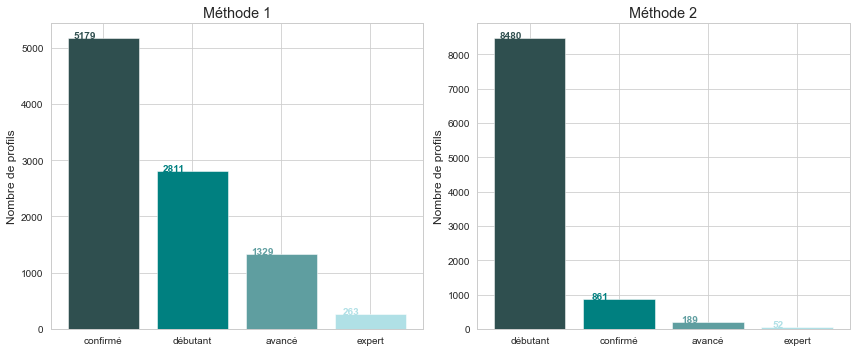

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

X_m1=df_methode_1['Exp_label'].value_counts().keys()
Y_m1=df_methode_1['Exp_label'].value_counts().values
X_m2=df_methode_2['Exp_label'].value_counts().keys()
Y_m2=df_methode_2['Exp_label'].value_counts().values
col = ['darkslategrey', 'teal', 'cadetblue', 'powderblue']
ax1.bar(X_m1, Y_m1, color=col)
ax1.set_title('Méthode 1')
ax1.set_ylabel('Nombre de profils')

ax2.bar(X_m2, Y_m2, color=col)
ax2.set_title('Méthode 2')
ax2.set_ylabel('Nombre de profils')

ind = 0
for tick in range(len(ax1.get_xticklabels())):
    ax1.text(tick-.21, Y_m1[ind], Y_m1[ind], horizontalalignment='center',  color=col[ind], weight='semibold')
    ind += 1
ind = 0
for tick in range(len(ax2.get_xticklabels())):
    ax2.text(tick-.21, Y_m2[ind], Y_m2[ind], horizontalalignment='center',  color=col[ind], weight='semibold')
    ind += 1 
plt.tight_layout()

plt.show()

On peut aussi comparer les labels selon les metiers (Data scientist, Data engineer,...)  
J'utilise dans la suite la méthode 2.

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

### Réponse 7)

Si on voulais extraire les technologies tels qu'elles sont introduites dans le dataset, on peut écrire la réponse de la façon suivante: 

In [29]:
new_df = df_methode_2

In [30]:
Top_tech = new_df['Technologies'].value_counts()[0:5]
print("Les 5 technologies les plus utilisées sont \n",Top_tech)

Les 5 technologies les plus utilisées sont 
 SQL/R/Python//Big data                                539
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    458
C++/R/Python/Matlab/Matplotlib                        273
SPSS/Excel/SAS/R/machine learning/AI/Scoring          250
Hadoop/Hive/Vertica/Tableau                           250
Name: Technologies, dtype: int64


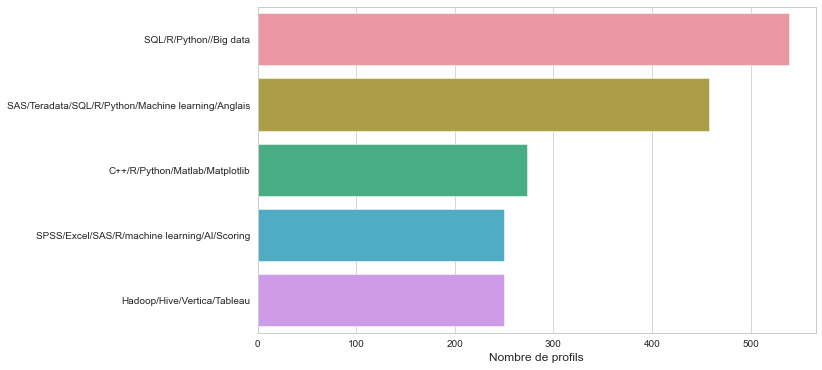

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sb.barplot(Top_tech.values, Top_tech.index)
ax.set_xlabel('Nombre de profils')
plt.show()

Sinon, il est plus intéressant de traiter la variable "Technologie" avec la librairie "re".

Je donne un exemple comment on peut transormer les "str" de cette variable :

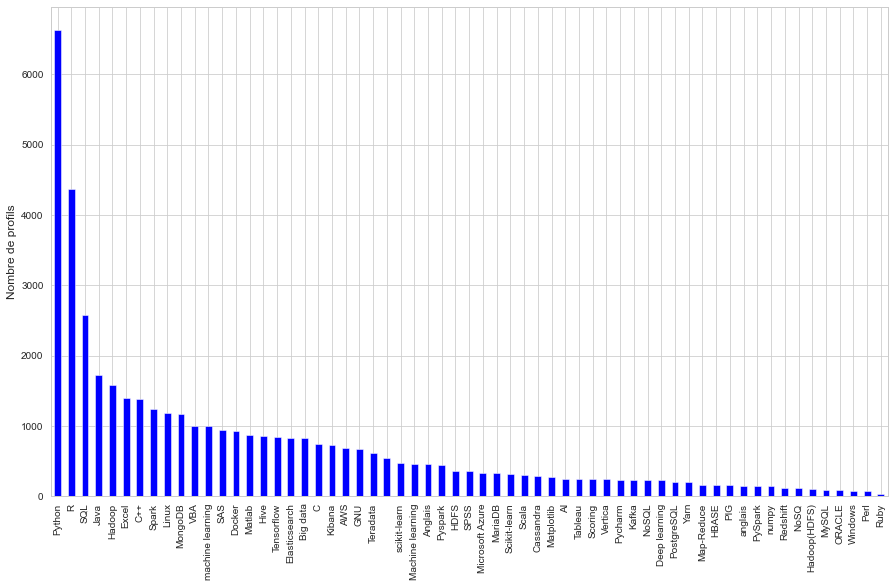

In [32]:
df_Technologies_m1 = pd.DataFrame(new_df.Technologies.str.split('/').tolist()).stack()
df_Technologies_m1  = pd.DataFrame(df_Technologies_m1)
df_Technologies_m1.columns = ['Technologies']

plt.figure(figsize=(15,9))
df_Technologies_m1['Technologies'].value_counts().plot(kind='bar')
plt.ylabel('Nombre de profils')
plt.show()

On remarque que ce traitement n'est pas suffisant. En effet, il y a:
- Des chaines de caractères qui se répètent à cause des mjuscules/minuscules (ex: 'machine learning' et 'Machine learning')
- Des espaces dues au double '//'
- Des technologies écrites différement mais qui ont la même signification, comme 'Hadoop' 'Hadoop(HDF5)' et 'HDFS'

Pour résoudre ce problème, j'ai utilisé la libraire 're' pour le découpage des chaines de charactères et prendre en considération les commentaires précédents 

In [33]:
#creation d'une copie de dataset
df_Technologies_m2 = new_df.copy()
#Algorithme
L_f=[]
for i in range(len(new_df)):
    # Découpage selon '/' ou '//'  
    l=re.split(r'[`!@#$%^&*()_\=\[\]{};\':"\\|,.<>\/?~]' ,new_df.Technologies[i])
    l[:] = (value for value in l if value != "")
    #Remlpacer les minuscule au début des mots par un majuscule et les technologies qui ont la même signification par un seul mot 
    replace_l = ['Scikit-learn' if wd == "scikit-learn" else wd for wd in l]
    replace_l1 = ['Machine learning' if wd == "machine learning" else wd for wd in replace_l]
    replace_l2 = ['Hadoop' if wd == "HDFS" or wd == 'Hadoop(HDF5)' else wd for wd in replace_l1]
    replace_l3 = ['Anglais' if wd == "anglais" else wd for wd in replace_l2]
    #Nouveau dataset
    df_Technologies_m2['Technologies'][i]= replace_l3
    L_f.append(replace_l3)

In [34]:
#Affichage
df_Technologies_methode2 = df_Technologies_m2
df_Technologies_m2

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,"[Matlab, Python, Pyspark, Scikit-learn, Tensor...",Master,1.0,Paris,débutant
1,Massachusetts General Hospital(MGH),Data architecte,"[Python, Java, Scala, MongoDB]",Master,3.0,Marseille,débutant
2,Delve,Lead data scientist,"[SPSS, SQL, Teradata, R, Python, Tensorflow, S...",Master,3.0,Nantes,débutant
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,"[C, C++, Java, Python]",Master,1.5,Marseille,débutant
4,Arm,Data scientist,"[Matlab, Python, C++, numpy, Tensorflow, Sciki...",Phd,2.0,Bordeaux,débutant
...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,"[C++, R, Python, Matlab, Matplotlib]",Master,1.5,Lyon,débutant
9578,Charles River Analytics,Data scientist,"[Excel, Python, Matlab, R, Machine learning, A...",Master,11.0,Toulouse,avancé
9579,Ball Aerospace,Data scientist,"[R, Machine learning, Excel, VBA]",Master,1.0,Paris,débutant
9580,Takeda Pharmaceutical,Data scientist,"[Python, Pyspark, Machine learning, Microsoft ...",Master,17.0,Rennes,expert


**Le nouveau "plot" des Technologies sera alors le suivant:**

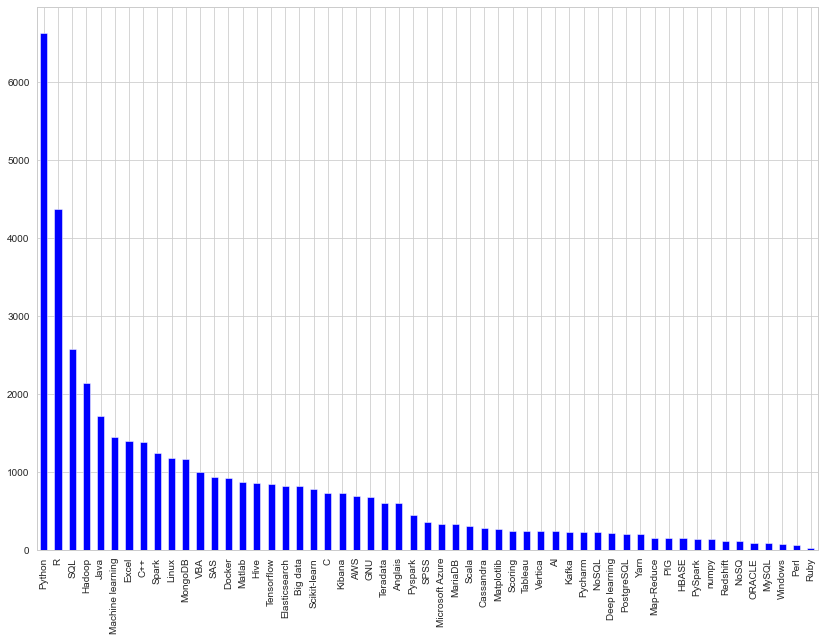

In [35]:

Technologies = pd.DataFrame(L_f).stack()
Technologies  = pd.DataFrame(Technologies)
Technologies.columns = ['Technologies']
plt.figure(figsize=(14,10))
Technologies['Technologies'].value_counts().plot(kind='bar')
plt.show()     

In [36]:
new_Top_tech = Technologies['Technologies'].value_counts()[0:5]
print("Les 5 technologies les plus utilisées sont \n",new_Top_tech)

Les 5 technologies les plus utilisées sont 
 Python    6627
R         4374
SQL       2581
Hadoop    2146
Java      1719
Name: Technologies, dtype: int64


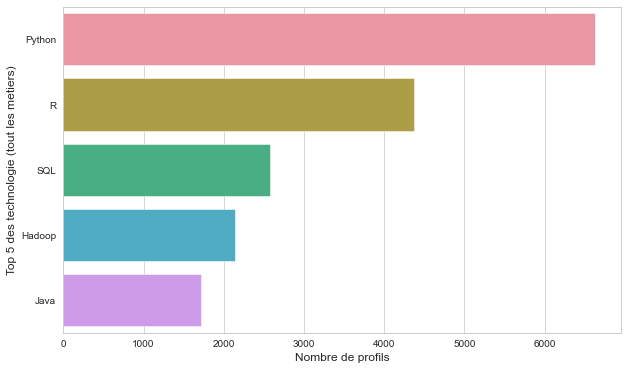

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sb.barplot(new_Top_tech.values, new_Top_tech.index)
ax.set_ylabel('Top 5 des technologie (tout les metiers)')
ax.set_xlabel('Nombre de profils')
plt.show()

**Et si on voulait la liste des technologies par metier (avec plot) pour faire une comparaison :**

In [38]:
# Liste des technologies par métier
df_Technologies_m2 = df_Technologies_m2.groupby('Metier')['Technologies'].apply(list)
df_Technologies_m2

Metier
Data architecte        [[Python, Java, Scala, MongoDB], [Java, Linux,...
Data engineer          [[Python, Java, Linux, GNU], [Hadoop, Hive, SQ...
Data scientist         [[Matlab, Python, Pyspark, Scikit-learn, Tenso...
Lead data scientist    [[SPSS, SQL, Teradata, R, Python, Tensorflow, ...
Name: Technologies, dtype: object

- Transforormation en tableau qui contient seulement les metiers et les technologies (par nombre de profils)

In [39]:
for i in range(len(df_Technologies_m2)):
    #renommer les metier, ex: Data architecte --> Data_architecte (pour pouvoir les traiter après)
    metier = df_Technologies_m2.index[i].replace(' ', '_')
    #comptage de nombre de profils par technologie 
    globals()[f'techs_{metier}'] = sum(df_Technologies_m2[i], [])
    #création d'un nouveau data frame
    globals()[f'count_techs_{metier}'] = dict((x,globals()[f'techs_{metier}'].count(x)) for x in set(globals()[f'techs_{metier}']))
    globals()[f'df_count_techs_{metier}'] = pd.DataFrame.from_dict(globals()[f'count_techs_{metier}'], orient='index')
    #renommer les colonnes par metiers
    globals()[f'df_count_techs_{metier}'].columns = [f'{metier}']

In [40]:
#grouper les data frames des 4 metiers
df_list= [df_count_techs_Data_scientist, df_count_techs_Lead_data_scientist, df_count_techs_Data_engineer, df_count_techs_Data_architecte]
df_Teq_par_metier = pd.concat(df_list, axis='columns')

In [41]:
# Remplacer les NaN par 0 (les metiers qui n'ont une technologie citée dans la liste)
df_Teq_par_metier = df_Teq_par_metier.fillna(0)
df_Teq_par_metier

,Data_scientist,Lead_data_scientist,Data_engineer,Data_architecte
PySpark,126.0,19.0,0.0,0.0
Matlab,713.0,157.0,0.0,0.0
Excel,1158.0,236.0,0.0,0.0
Python,3274.0,1132.0,1181.0,1025.0
VBA,819.0,181.0,0.0,0.0
Anglais,373.0,226.0,0.0,0.0
Tensorflow,727.0,120.0,0.0,0.0
Spark,387.0,57.0,544.0,249.0
Microsoft Azure,271.0,66.0,0.0,0.0
Matplotlib,225.0,48.0,0.0,0.0


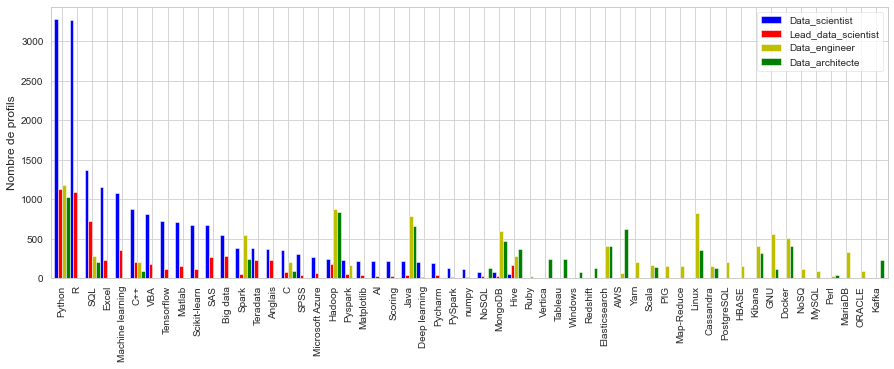

In [42]:
df_Teq_par_metier.sort_values('Data_scientist', ascending=False, inplace=True)
df_Teq_par_metier.plot(kind='bar', color = ['b','r','y','g'], width=1, figsize = (15,5))
plt.ylabel('Nombre de profils')
plt.show()

**On peut remarque qu'il y a deux groups selon les technologies maîtrisées:**
- Premier groupe : Data scientist et Lead data scientist
- Deuxième groupe : Data engineer et Data architecte

**Plot**

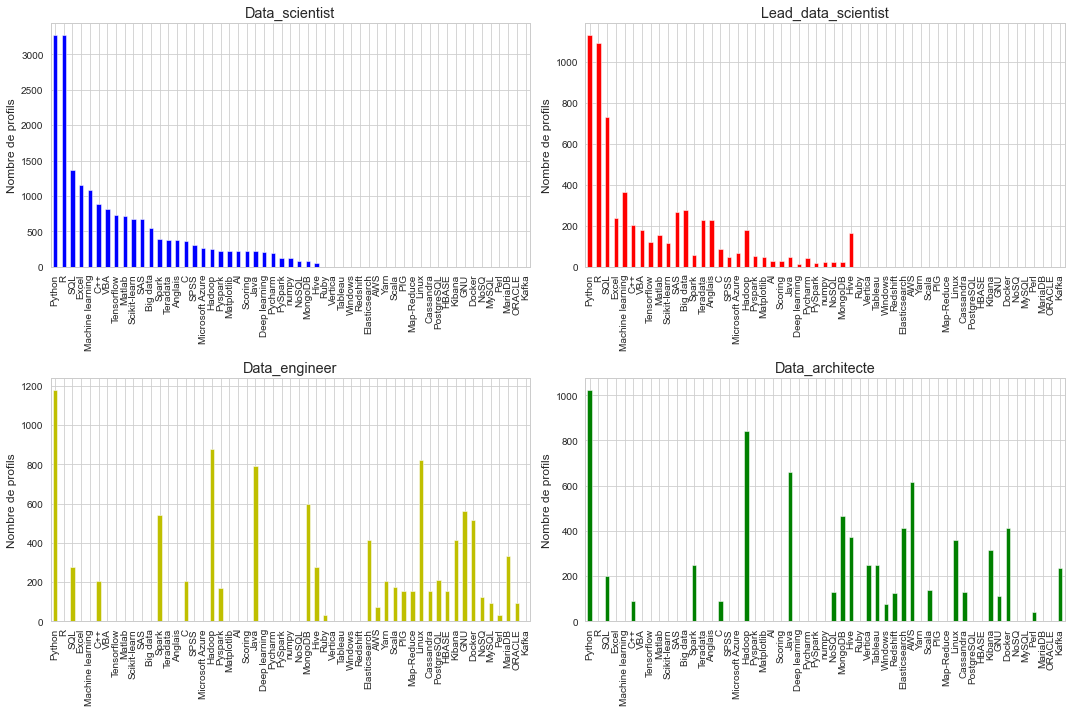

In [43]:
features = list(df_Teq_par_metier.keys())
ncols = 2
nrows = 2
fig = plt.figure(figsize=(15,10))
n = 0
col = ['b','r','y','g']
for feature in features:
    ax = plt.subplot(nrows, ncols, n + 1)
    ax = df_Teq_par_metier[feature].plot(kind='bar', color=col[n])
    ax.set_ylabel('Nombre de profils')
    ax.set_title(f'{feature}')
    n = n + 1
plt.tight_layout()
plt.show()

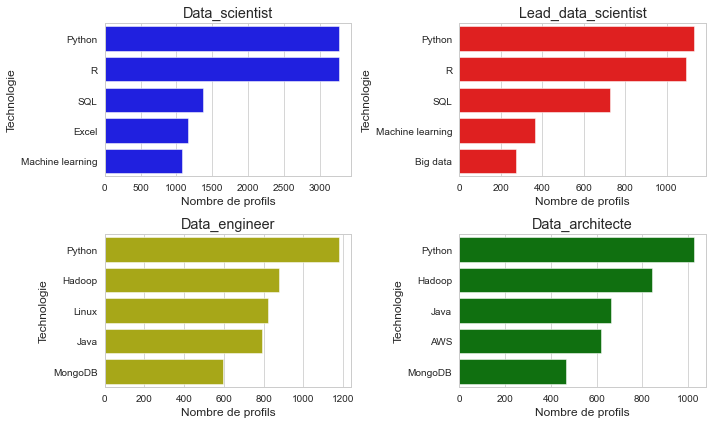

In [44]:
features = list(df_Teq_par_metier.keys())
ncols = 2
nrows = 2
fig = plt.figure(figsize=(10,6))
n = 0
col = ['b','r','y','g']
for feature in features:
    ax = plt.subplot(nrows, ncols, n + 1)
    df_Teq_par_metier.sort_values(feature, ascending=False, inplace=True)
    top_tech = df_Teq_par_metier[feature][0:5]
    ax = sb.barplot(top_tech.values, top_tech.index, color = col[n])  
    ax.set_ylabel('Technologie')
    ax.set_xlabel('Nombre de profils')
    ax.set_title(f'{feature}')
    n = n + 1
plt.tight_layout()
plt.show()

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

### Réponse 8)

**Préparation des données**:
- La première étape est de coder le dataset en utilisant la librairie scikit-learn (module "preprocessing"):

**En utlisant la méthode 1 de traitement des technologies de la question précédente :**

In [45]:
from sklearn import preprocessing
new_df1 = new_df.copy()
le1 = preprocessing.LabelEncoder()
new_df_enc1 = new_df1.loc[:,['Experience']]
new_df_enc1['Ville_enc'] = pd.Series(le1.fit_transform(np.squeeze(new_df1.loc[:,['Ville']])[:]), index = new_df_enc1.index)
new_df_enc1['Technologies_enc'] = pd.Series(le1.fit_transform(np.squeeze(new_df1.loc[:,['Technologies']])[:]), index = new_df_enc1.index)
new_df_enc1['Diplome_enc'] = pd.Series(le1.fit_transform(np.squeeze(new_df1.loc[:,['Diplome']])[:]), index = new_df_enc1.index)
new_df_enc1['Exp_label_enc'] = pd.Series(le1.fit_transform(np.squeeze(new_df1.loc[:,['Exp_label']])[:]), index = new_df_enc1.index)
new_df_enc1 = np.round(new_df_enc1,2)
new_df_enc1.head(10)

,Experience,Ville_enc,Technologies_enc,Diplome_enc,Exp_label_enc
0,1.0,8,27,1,2
1,3.0,4,34,1,2
2,3.0,6,51,1,2
3,1.5,4,2,1,2
4,2.0,0,26,3,2
5,6.0,2,56,1,1
6,0.0,2,11,0,2
7,4.0,13,17,0,2
8,8.0,8,19,0,1
9,5.0,13,33,1,2


Ensuite **normalisation des données**  (entre 0 et 1, selon le min et max de chaque variable)

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

X1 = new_df_enc1.astype(float)
scaler1 = MinMaxScaler()
X_scaled1 = scaler1.fit_transform(X1)


On utilise la méthode k-means pour le clustering non supervisé, car on connaît le nombre des clusters (=2).  Pr conséquent, k-means sera simple à analyser et avec un temps de calcul rapide. 

In [47]:
model1 = KMeans(n_clusters=2)
model1.fit(X_scaled1)
#model.predict(X_scaled)
labels1_ = model1.labels_
c1_1, c2_1 = model1.cluster_centers_

In [48]:
Kmeans_label1 = pd.DataFrame(labels1_, columns= ["K_labels"])

In [49]:
cluster_data1 = pd.concat([new_df1,Kmeans_label1], axis= 1)

In [50]:
cluster_data1.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,K_labels
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,débutant,0
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,débutant,0
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,débutant,0
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,débutant,0
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.0,Bordeaux,débutant,1


In [51]:
model1.inertia_

2203.5009687271245

**Evaluation des performances de K-means** avec la **méthode 1**  
Pour évaluer la performance de l'algorithme, on peut utiliser un indicateur d'écart pour mesurer les erreurs de prévision. On peut utiliser MSE (surtout pour les clustering) ou RMSE (pour les classifications).  
Avec MSE: Le carré moyen des erreurs, c'est la moyenne arithmétique des carrés des écarts entre prévisions du modèle kmeans et observations (new_df_enc).  
ET RMSE: le racine carrée du MSE (n'est pas très pertinent dans notre cas).  
Et puisque on a normalisé nos données avant, on utilisera alors le RMSE normalisé: NRMSE

In [52]:
# Evaluation de l'erreur de clustering
def NMSE(x,y):
    return ((x-y)**2).sum() / ((x)**2).sum()
    
NMSE1_1 = NMSE(X_scaled1[labels1_==0], c1_1) 
NMSE1_2 = NMSE(X_scaled1[labels1_==1], c2_1)
print('NRMSE  cluster 1 = ',round(NMSE1_1,2))
print('NRMSE  cluster 2 = ',round(NMSE1_2,2))

NRMSE  cluster 1 =  0.19
NRMSE  cluster 2 =  0.12


- On peut aussi utiliser "from sklearn.metrics import mean_squared_error", évaluer la stabilité du clustring,...  

- Les NRMSE sont faibles, donc on peut estimer que la regression est fiable (plus la valeur s'approche de 0, plus le modèle est parfait.

- on peut aussi évaluer le nombre de cluster (en utilisant elbow method ou silhouette coefficient)

**Plots** :

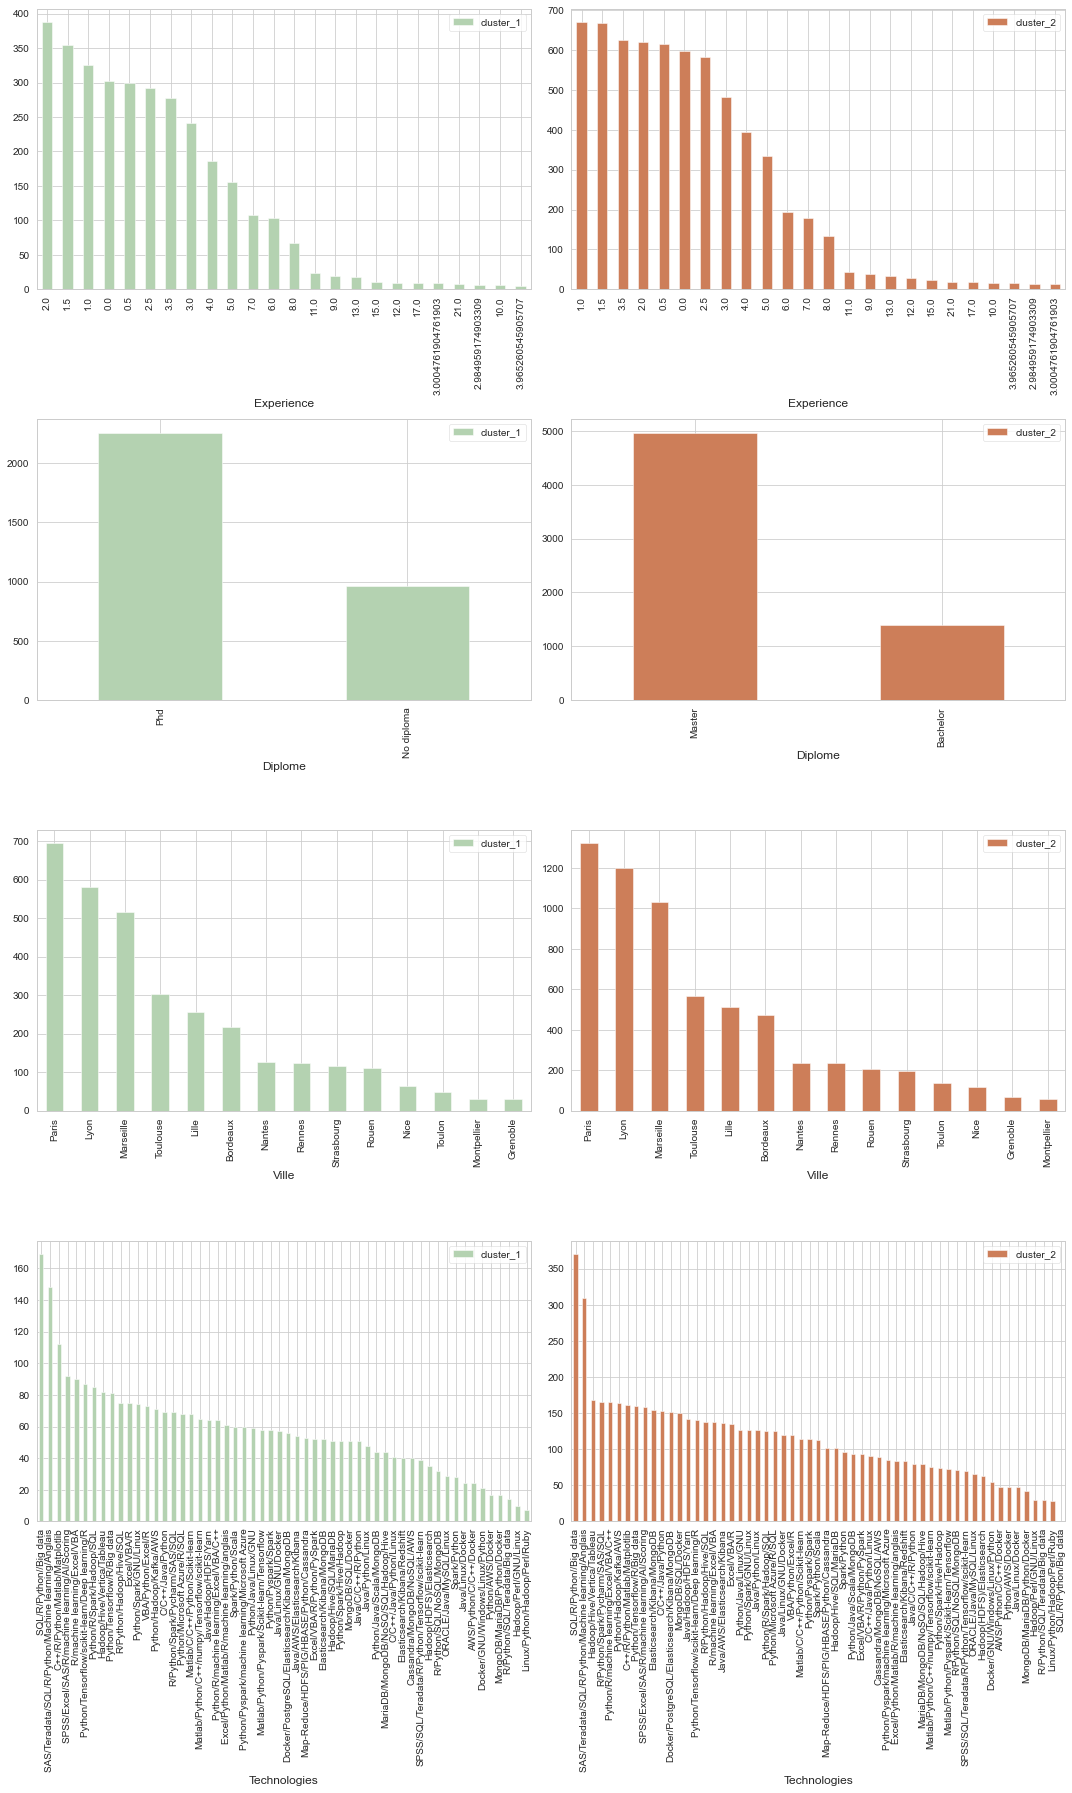

In [53]:
features = ['Experience', 'Diplome', 'Ville', 'Technologies']
ncols = 2
nrows = len(features)
fig = plt.figure(figsize=(15,25))
n = 0
for feature in features:
    ax = plt.subplot(nrows, ncols, n + 1)
    ax = cluster_data1.loc[labels1_==1, feature].value_counts().plot(kind='bar', color='#b4d2b1', label='cluster_1')
    plt.xlabel(feature)
    plt.legend()
    ax = plt.subplot(nrows, ncols, n + 2)
    ax = cluster_data1.loc[labels1_==0,feature].value_counts().plot(kind='bar', color='#cd7e59', label='cluster_2')
    plt.xlabel(feature)
    plt.legend()
    n = n + 2
    plt.tight_layout()
plt.show()

**Interprétation des resultats en utilisant la méthode 1**

On peut remarquer que:
- Les caracteristiques imortantes des deux clusters sont l'Expérience (valeurs plus élevées en cluster 2) et  le 'Diplome' ('Master' & 'Bachelor' pour le cluster 2 et 'No diplome' & 'PhD' pour le  cluster 1).


**En utlisant la méthode 2 de traitement des technologies de la question précédente :**

On refait la même démarche mais on code la variable Technologies d'une autre manière

On considère le dataset suivant:

In [54]:
df_Technologies_methode2

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,"[Matlab, Python, Pyspark, Scikit-learn, Tensor...",Master,1.0,Paris,débutant
1,Massachusetts General Hospital(MGH),Data architecte,"[Python, Java, Scala, MongoDB]",Master,3.0,Marseille,débutant
2,Delve,Lead data scientist,"[SPSS, SQL, Teradata, R, Python, Tensorflow, S...",Master,3.0,Nantes,débutant
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,"[C, C++, Java, Python]",Master,1.5,Marseille,débutant
4,Arm,Data scientist,"[Matlab, Python, C++, numpy, Tensorflow, Sciki...",Phd,2.0,Bordeaux,débutant
...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,"[C++, R, Python, Matlab, Matplotlib]",Master,1.5,Lyon,débutant
9578,Charles River Analytics,Data scientist,"[Excel, Python, Matlab, R, Machine learning, A...",Master,11.0,Toulouse,avancé
9579,Ball Aerospace,Data scientist,"[R, Machine learning, Excel, VBA]",Master,1.0,Paris,débutant
9580,Takeda Pharmaceutical,Data scientist,"[Python, Pyspark, Machine learning, Microsoft ...",Master,17.0,Rennes,expert


In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [56]:
onehot_encoder = OneHotEncoder(sparse=False)
mlb = MultiLabelBinarizer()

In [57]:
X_mlb = mlb.fit_transform(df_Technologies_methode2.Technologies)
new_df_Technologies_methode2 = pd.DataFrame(X_mlb, columns=mlb.classes_)
#new_df_Technologies_methode2


In [58]:
X_mlb = onehot_encoder.fit_transform(df_Technologies_methode2[['Diplome']])

In [59]:
Diplome_names = ['Bachelor', 'Master', 'No diploma', 'PhD']
Diplome_encoded = pd.DataFrame(X_mlb, columns=Diplome_names)

In [60]:
new_df_enc2 = Diplome_encoded.join(new_df_Technologies_methode2)
new_df_enc2 = new_df_enc2.join(new_df.Experience)
new_df_enc2

,Bachelor,Master,No diploma,PhD,AI,AWS,Anglais,Big data,C,C++,...,Spark,Tableau,Tensorflow,Teradata,VBA,Vertica,Windows,Yarn,numpy,Experience
0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
1,0.0,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
2,0.0,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,3.0
3,0.0,1.0,0.0,0.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1.5
4,0.0,0.0,0.0,1.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,0.0,1.0,0.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.5
9578,0.0,1.0,0.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,11.0
9579,0.0,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.0
9580,0.0,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17.0


In [61]:
X2 = new_df_enc2.astype(float)
scaler2 = MinMaxScaler()
X_scaled2 = scaler1.fit_transform(X2)

In [62]:
model2 = KMeans(n_clusters=2)
model2.fit(X_scaled2)

KMeans(n_clusters=2)

In [63]:
labels2_ = model2.labels_
c1_2, c2_2 = model2.cluster_centers_

In [64]:
Kmeans_label2 = pd.DataFrame(labels2_, columns= ["K_labels"])
cluster_data2 = pd.concat([df_Technologies_methode2,Kmeans_label2], axis= 1)


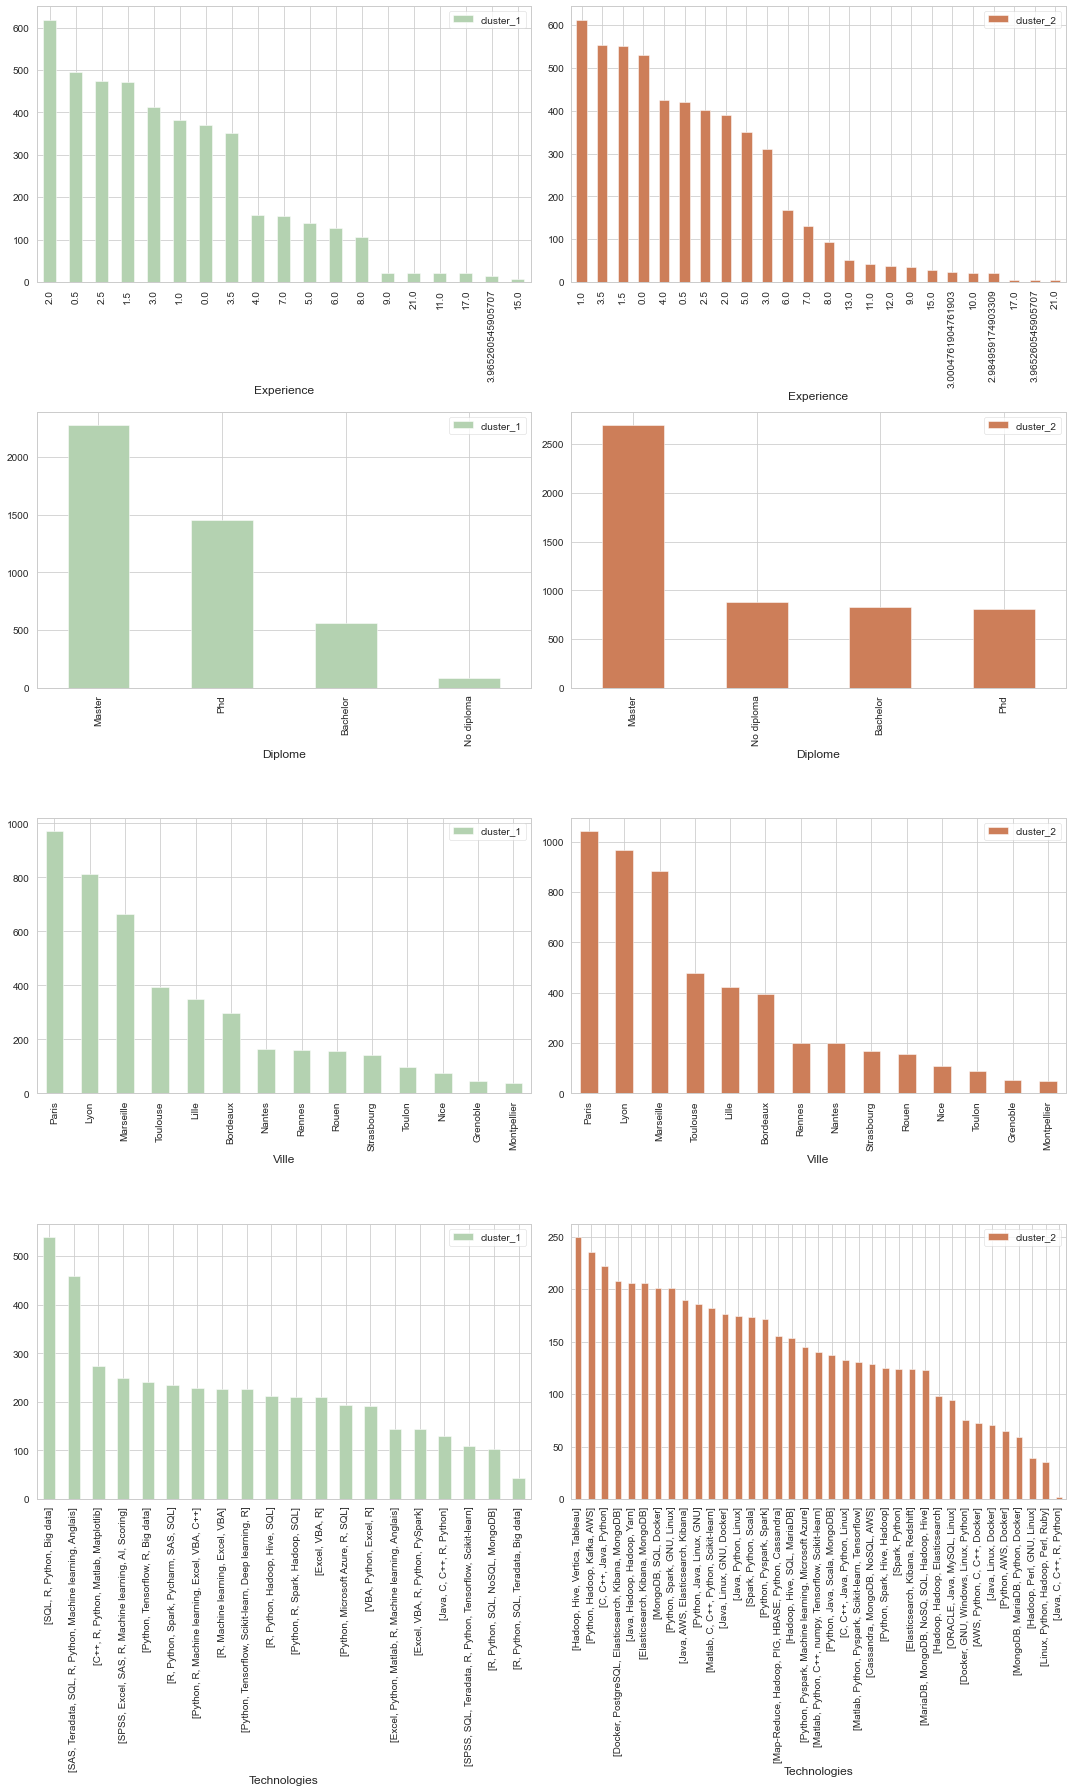

In [65]:
features = ['Experience', 'Diplome', 'Ville', 'Technologies']
ncols = 2
nrows = len(features)
fig = plt.figure(figsize=(15,25))
n = 0
for feature in features:
    ax = plt.subplot(nrows, ncols, n + 1)
    ax = cluster_data2.loc[labels2_==1, feature].value_counts().plot(kind='bar', color='#b4d2b1', label='cluster_1')
    plt.xlabel(feature)
    plt.legend()
    ax = plt.subplot(nrows, ncols, n + 2)
    ax = cluster_data2.loc[labels2_==0,feature].value_counts().plot(kind='bar', color='#cd7e59', label='cluster_2')
    plt.xlabel(feature)
    plt.legend()
    n = n + 2
    plt.tight_layout()
plt.show()

**Interprétation des resultats en utilisant la méthode 2**

On peut remarquer que:
- La caracteristique la plus imortantes est "Technologies" 
- La deuxièmme caracteristique est "Experience"

In [66]:
print('les Technologies qui reviennent plus souvent en cluster 2 sont\n',cluster_data2.loc[labels2_==0,'Technologies'].value_counts()[0:2])

les Technologies qui reviennent plus souvent en cluster 2 sont
 [Hadoop, Hive, Vertica, Tableau]    250
[Python, Hadoop, Kafka, AWS]        235
Name: Technologies, dtype: int64


In [67]:
print('les Technologies qui reviennent plus souvent en cluster 1 sont\n',cluster_data2.loc[labels2_==1,'Technologies'].value_counts()[0:2])

les Technologies qui reviennent plus souvent en cluster 1 sont
 [SQL, R, Python, Big data]                                    540
[SAS, Teradata, SQL, R, Python, Machine learning, Anglais]    458
Name: Technologies, dtype: int64


### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

### Réponse 9)

- Préparer les données:

In [159]:
from sklearn import model_selection

# Supprimer les metiers NaN
mask_metier = new_df.loc[:,'Metier'].isna()
# Le nouveau dataset
X = np.array(new_df_enc1[~mask_metier])
y = le1.fit_transform(new_df.loc[~mask_metier,'Metier'].dropna())

- Diviser les données: Entrainement = 0.75, Test = 0.25

In [160]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.25, shuffle=True , random_state=40)

**Modèle KNN (méthode 1)**

Le modèle: les K plus proches voisins, donne un bon résultat (parmi d'autres testés). 

In [161]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [162]:
knn = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

In [163]:
y_predicted_knn = knn.predict(X_test)
#y_predicted_knnr = knnr.predict(X_test)

In [164]:
cm_knn = confusion_matrix(y_test, y_predicted_knn) 

- Le rapport de classificiation est:

In [165]:
print(classification_report(y_test,y_predicted_knn))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       542
           1       0.84      0.81      0.83       557
           2       0.81      0.88      0.84       988
           3       0.63      0.35      0.45       304

    accuracy                           0.80      2391
   macro avg       0.77      0.73      0.74      2391
weighted avg       0.79      0.80      0.79      2391



In [166]:
print("La précision =",(accuracy_score(y_test, y_predicted_knn)*100),"%")


La précision = 80.00836470096195 %


**Prédiction des metiers manquants**

In [167]:
Metier_na = np.array(new_df_enc1[mask_metier])
Metier_predicted = knn.predict(Metier_na)

In [168]:
df.loc[~mask_metier, 'Metier_predicted'] = df.loc[:,'Metier']
df.loc[mask_metier, 'Metier_predicted'] = le1.inverse_transform(Metier_predicted)

**Résultats de la prédiction :**

Visulaisation du dataset avec les metiers prédits

In [169]:
df

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Metier_predicted
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Data scientist
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,Data architecte
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,Lead data scientist
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,Data scientist
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux,Data scientist
...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,Data scientist
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,Data scientist
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris,Data scientist
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,Data scientist


**Tableau des metiers manquants avec les prédictions**

In [170]:
df_Metier_predicted_KNN_m1 = df[mask_metier]['Metier_predicted']

df[mask_metier]

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Metier_predicted
346,Jacobs,NaN,Python/Spark/GNU/Linux,No diploma,2.5,Paris,Data engineer
2058,Ball Aerospace,NaN,VBA/Python/Excel/R,Master,15.0,Lyon,Data engineer
2670,"eHire, LLC",NaN,Java/C/C++/R/Python,Master,1.5,Toulouse,Data scientist
2899,Norfolk Southern Corp,NaN,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,0.0,Grenoble,Data scientist
3346,J.E. Ranta Associates,NaN,Cassandra/MongoDB/NoSQL/AWS,Master,7.0,Rennes,Data architecte
4248,KPMG,NaN,Python/Microsoft Azure/R/SQL,Phd,2.0,Lyon,Data scientist
4290,"Pandora Media, Inc.",NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Phd,1.5,Toulouse,Data scientist
4292,Partners HealthCare(PHS),NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,8.0,Bordeaux,Lead data scientist
5425,Ashton Lane Group,NaN,Python/Pyspark/Spark,No diploma,5.0,Lyon,Data engineer
5593,Lighthouse Lab Services,NaN,Python/R/machine learning/Excel/VBA/C++,Master,3.0,Lyon,Data scientist


**Modèle KNN (méthode 2)**

In [171]:
mask_metier_2 = df_Technologies_methode2.loc[:,'Metier'].isna()
# Le nouveau dataset
X_m2 = np.array(new_df_enc2[~mask_metier])
y_m2 = le1.fit_transform(df_Technologies_methode2.loc[~mask_metier,'Metier'].dropna())
X_train_m2, X_test_m2, y_train_m2, y_test_m2 = model_selection.train_test_split(X_m2, y_m2, test_size=.25, shuffle=True , random_state=40)

In [172]:
knn_m2 = KNeighborsClassifier(n_neighbors=4).fit(X_train_m2,y_train_m2)
y_predicted_knn_m2 = knn_m2.predict(X_test_m2)
cm_knn_m2 = confusion_matrix(y_test_m2, y_predicted_knn_m2) 

In [173]:
print(classification_report(y_test_m2,y_predicted_knn_m2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       542
           1       0.99      0.97      0.98       557
           2       0.83      0.93      0.88       988
           3       0.65      0.38      0.48       304

    accuracy                           0.88      2391
   macro avg       0.86      0.81      0.82      2391
weighted avg       0.87      0.88      0.87      2391



In [174]:
print("La précision de la méthode 2 =",(accuracy_score(y_test_m2, y_predicted_knn_m2)*100),"%")

La précision de la méthode 2 = 88.03847762442493 %


In [175]:
Metier_na_m2= np.array(new_df_enc2[mask_metier_2])
Metier_predicted_m2 = knn_m2.predict(Metier_na_m2)

In [176]:
df.loc[~mask_metier_2, 'Metier_predicted'] = df.loc[:,'Metier']
df.loc[mask_metier_2, 'Metier_predicted'] = le1.inverse_transform(Metier_predicted_m2)

In [177]:
df

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Metier_predicted
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,Data scientist
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille,Data architecte
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes,Lead data scientist
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille,Data scientist
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux,Data scientist
...,...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon,Data scientist
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse,Data scientist
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris,Data scientist
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes,Data scientist


In [178]:
df_Metier_predicted_KNN_m2 = df[mask_metier_2]['Metier_predicted']
df[mask_metier_2]

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Metier_predicted
346,Jacobs,NaN,Python/Spark/GNU/Linux,No diploma,2.5,Paris,Data engineer
2058,Ball Aerospace,NaN,VBA/Python/Excel/R,Master,15.0,Lyon,Data scientist
2670,"eHire, LLC",NaN,Java/C/C++/R/Python,Master,1.5,Toulouse,Data scientist
2899,Norfolk Southern Corp,NaN,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,0.0,Grenoble,Data scientist
3346,J.E. Ranta Associates,NaN,Cassandra/MongoDB/NoSQL/AWS,Master,7.0,Rennes,Data architecte
4248,KPMG,NaN,Python/Microsoft Azure/R/SQL,Phd,2.0,Lyon,Data scientist
4290,"Pandora Media, Inc.",NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Phd,1.5,Toulouse,Data scientist
4292,Partners HealthCare(PHS),NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,8.0,Bordeaux,Lead data scientist
5425,Ashton Lane Group,NaN,Python/Pyspark/Spark,No diploma,5.0,Lyon,Data engineer
5593,Lighthouse Lab Services,NaN,Python/R/machine learning/Excel/VBA/C++,Master,3.0,Lyon,Lead data scientist


**Modèle Gradient Boosting (méthode 2)**

In [179]:
from sklearn.ensemble import GradientBoostingClassifier
Xgb = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train_m2,y_train_m2)
y_predicted_Xgb_m2 = Xgb.predict(X_test_m2)
cm_Xgb_m2 = confusion_matrix(y_test_m2, y_predicted_Xgb_m2)
print(classification_report(y_test_m2,y_predicted_Xgb_m2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       542
           1       1.00      1.00      1.00       557
           2       0.85      0.91      0.88       988
           3       0.64      0.47      0.54       304

    accuracy                           0.90      2391
   macro avg       0.87      0.84      0.85      2391
weighted avg       0.89      0.90      0.89      2391



In [180]:
print("La précision =",round((accuracy_score(y_test_m2, y_predicted_Xgb_m2)*100)),"%")

La précision = 90 %


- 'KNN' et 'Gradient Boosting' donnent des précisions plus élevées (88 % et 90 % respectivement) avec la deuxièmme méthode de codage des données

In [181]:
Metier_na_m2= np.array(new_df_enc2[mask_metier_2])
Metier_predicted_m2 = Xgb.predict(Metier_na_m2)

In [182]:
df.loc[~mask_metier_2, 'Metier_predicted'] = df.loc[:,'Metier']
df.loc[mask_metier_2, 'Metier_predicted'] = le1.inverse_transform(Metier_predicted_m2)

- 'KNN' et 'Gradient Boosting' donnent des précisions plus élevées (88 % et 90 % respectivement) avec la deuxièmme méthode de codage des données

In [183]:
df_Metier_predicted_Xgb_m2 = df[mask_metier_2]['Metier_predicted']
df[mask_metier_2]

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Metier_predicted
346,Jacobs,NaN,Python/Spark/GNU/Linux,No diploma,2.5,Paris,Data engineer
2058,Ball Aerospace,NaN,VBA/Python/Excel/R,Master,15.0,Lyon,Data scientist
2670,"eHire, LLC",NaN,Java/C/C++/R/Python,Master,1.5,Toulouse,Data scientist
2899,Norfolk Southern Corp,NaN,Python/Tensorflow/scikit-learn/Deep learning/R,Phd,0.0,Grenoble,Data scientist
3346,J.E. Ranta Associates,NaN,Cassandra/MongoDB/NoSQL/AWS,Master,7.0,Rennes,Data architecte
4248,KPMG,NaN,Python/Microsoft Azure/R/SQL,Phd,2.0,Lyon,Data scientist
4290,"Pandora Media, Inc.",NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Phd,1.5,Toulouse,Data scientist
4292,Partners HealthCare(PHS),NaN,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,8.0,Bordeaux,Lead data scientist
5425,Ashton Lane Group,NaN,Python/Pyspark/Spark,No diploma,5.0,Lyon,Data engineer
5593,Lighthouse Lab Services,NaN,Python/R/machine learning/Excel/VBA/C++,Master,3.0,Lyon,Lead data scientist


In [184]:
df_Metier_predicted_Xgb_m2 = pd.DataFrame(df_Metier_predicted_Xgb_m2)
df_Metier_predicted_KNN_m2 = pd.DataFrame(df_Metier_predicted_KNN_m2)
df_Metier_predicted_KNN_m1 = pd.DataFrame(df_Metier_predicted_KNN_m1)

In [185]:
df_Metier_predicted_Xgb_m2.rename(columns={"Metier_predicted": "Metier_predicted_Xgb_m2"},inplace=True)
df_Metier_predicted_KNN_m2.rename(columns={"Metier_predicted": "Metier_predicted_KNN_m2"},inplace=True)
df_Metier_predicted_KNN_m1.rename(columns={"Metier_predicted": "Metier_predicted_KNN_m1"},inplace=True)

In [197]:
df_Tq_Ex = df[mask_metier_2][['Technologies','Experience']]

In [199]:
new_df_Metier_predicted = df_Tq_Ex.join([df_Metier_predicted_KNN_m1,df_Metier_predicted_KNN_m2,df_Metier_predicted_Xgb_m2])

In [200]:
new_df_Metier_predicted

,Technologies,Experience,Metier_predicted_KNN_m1,Metier_predicted_KNN_m2,Metier_predicted_Xgb_m2
346,Python/Spark/GNU/Linux,2.5,Data engineer,Data engineer,Data engineer
2058,VBA/Python/Excel/R,15.0,Data engineer,Data scientist,Data scientist
2670,Java/C/C++/R/Python,1.5,Data scientist,Data scientist,Data scientist
2899,Python/Tensorflow/scikit-learn/Deep learning/R,0.0,Data scientist,Data scientist,Data scientist
3346,Cassandra/MongoDB/NoSQL/AWS,7.0,Data architecte,Data architecte,Data architecte
4248,Python/Microsoft Azure/R/SQL,2.0,Data scientist,Data scientist,Data scientist
4290,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,1.5,Data scientist,Data scientist,Data scientist
4292,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,8.0,Lead data scientist,Lead data scientist,Lead data scientist
5425,Python/Pyspark/Spark,5.0,Data engineer,Data engineer,Data engineer
5593,Python/R/machine learning/Excel/VBA/C++,3.0,Data scientist,Lead data scientist,Lead data scientist
